# 一、实验背景
   变压器在电力系统中起着非常重要的作用。尽管它们是电网中最可靠的组件，但由于许多内部或外部因素，它们也容易发生故障。可能有许多引发变压器故障的启动器，但可能导致灾难性故障的引发器如下：机械故障、介电故障。
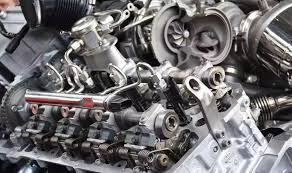

# 二、实验设计
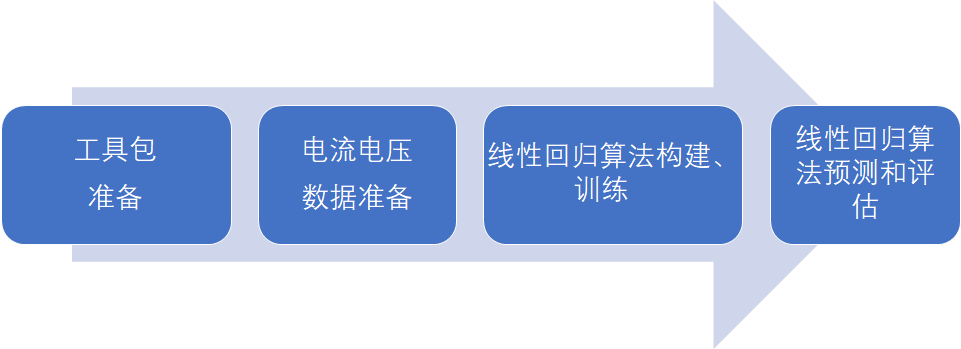

#  三、实验详细步骤及实现

## 步骤一：导入工具包

In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## 步骤二：实验数据准备

### 1、实验数据获取

In [3]:
df_vc = pd.read_csv("voltage_current_data.csv")
df_vc.head(5)#读取并查看前五条数据

,voltage,current,type
0,26.040247,68.654996,Silicon
1,16.202469,45.383931,Silicon
2,18.105575,45.662902,Silicon
3,18.499687,49.730946,Silicon
4,23.625672,64.926232,Silicon


In [5]:
print(df_vc)# vlotage:电压，current：电流，type：类型

       voltage    current       type
0    26.040247  68.654996    Silicon
1    16.202469  45.383931    Silicon
2    18.105575  45.662902    Silicon
3    18.499687  49.730946    Silicon
4    23.625672  64.926232    Silicon
..         ...        ...        ...
145  15.716044  84.382620  Germanium
146  15.122615  78.504282  Germanium
147  13.102318  67.532704  Germanium
148  14.099747  78.636444  Germanium
149  18.694984  96.723060  Germanium

[150 rows x 3 columns]


In [4]:
df_vc.describe()

,voltage,current
count,150.000000,150.000000
mean,20.327263,81.716702
std,4.843580,29.282899
min,10.439434,32.838181
25%,17.256052,60.400333
50%,19.887403,77.494476
75%,22.937969,98.674604
max,31.456767,171.544448


### 2、数据预处理

In [46]:
two_features = ['voltage', 'type']                             #创建列表list，设置索引
two_feature_data = pd.DataFrame(df_vc[two_features])           #创建一个DataFrame，仅保留voltage和type
dummies = pd.get_dummies(two_feature_data['type'])             #将‘type’变量设置为虚拟变量
data_w_dummies = pd.concat([two_feature_data, dummies], axis=1)#连接两个DataFrame，其中axis=1代表水平连接

In [47]:
data_w_dummies

,voltage,type,Carbon,Germanium,Silicon
0,26.040247,Silicon,0,0,1
1,16.202469,Silicon,0,0,1
2,18.105575,Silicon,0,0,1
3,18.499687,Silicon,0,0,1
4,23.625672,Silicon,0,0,1
...,...,...,...,...,...
145,15.716044,Germanium,0,1,0
146,15.122615,Germanium,0,1,0
147,13.102318,Germanium,0,1,0
148,14.099747,Germanium,0,1,0


In [39]:
data_w_dummies = data_w_dummies.drop(['type'], axis=1)         #type已经recoding成为虚拟变量，删除原有的tpye变量
data_w_dummies.iloc[48:52, :]                                  #查看第48到52行包含所有列的数据

,voltage,Carbon,Germanium,Silicon
48,22.859473,0,0,1
49,28.763284,0,0,1
50,12.777193,1,0,0
51,18.781104,1,0,0


## 步骤三：模型训练

### 模型1

In [34]:
f_with_type = linear_model.LinearRegression()
f_with_type.fit(data_w_dummies, df_vc['current'])

LinearRegression()

In [35]:
f_with_type.coef_

array([  4.03744567,  -1.04996567,  26.83843466, -25.78846899])

In [36]:
f_with_type.intercept_

-0.35351803812463345

In [41]:
mean_squared_error(f_with_type.predict(data_w_dummies), df_vc['current'])

62.542793422591046

### 模型2

In [40]:
data_w_scaled_dummies = data_w_dummies.copy()
data_w_scaled_dummies['Carbon'] = data_w_scaled_dummies['Carbon'] * data_w_scaled_dummies['voltage']
data_w_scaled_dummies['Germanium'] = data_w_scaled_dummies['Germanium'] * data_w_scaled_dummies['voltage']
data_w_scaled_dummies['Silicon'] = data_w_scaled_dummies['Silicon'] * data_w_scaled_dummies['voltage']
data_w_scaled_dummies = data_w_scaled_dummies.drop(['voltage'], axis=1)
data_w_scaled_dummies.iloc[48:52, :]

,Carbon,Germanium,Silicon
48,0.000000,0.0,22.859473
49,0.000000,0.0,28.763284
50,12.777193,0.0,0.000000
51,18.781104,0.0,0.000000


In [9]:
f_vc_with_scaled_type = linear_model.LinearRegression()
f_vc_with_scaled_type.fit(data_w_scaled_dummies, df_vc['current'])
mean_squared_error(f_vc_with_scaled_type.predict(data_w_scaled_dummies), df_vc['current'])

25.714214023084757

In [10]:
f_vc_with_scaled_type.coef_

array([3.9045347 , 5.29989642, 2.72432338])

In [11]:
f_vc_with_scaled_type.intercept_

1.2044777216613056